<a href="https://colab.research.google.com/github/Vinod050393/Rental_Cycle_Analysis/blob/main/Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement:**

To sustain and expand its electric cycle rental services, XYZ needs to comprehend the demand patterns for electric cycles. Therefore, the primary focus is to establish the relationships between electric cycle rentals and various other variables, enabling data-driven decision-making.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway, kruskal
from statsmodels.graphics.gofplots import qqplot # to check for gaussion
from scipy.stats import shapiro # to check for gaussion for sample size 50-200
from scipy.stats import levene # to check if variance of datasets are equal

## Loading and cleaning of the data

In [ ]:
!gdown 1pCRpSf9NeZC_eDdteD563ANxxvQf-02v

In [ ]:
df = pd.read_csv('/content/XYZ_HT.csv')

In [ ]:
df.shape

(10886, 12)

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
# Convert all the columns into desired format for better usage and memory optimization.

df['datetime'] = pd.to_datetime(df['datetime'])
df['season'] = df['season'].astype('category')
df['holiday'] = df['holiday'].astype('category')
df['workingday'] = df['workingday'].astype('category')
df['weather'] = df['weather'].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: category(4), datetime64[ns](1), float64(3), int64(4)
memory usage: 723.7 KB


In [ ]:
round(100* df.isna().sum()/len(df.index), 2)

datetime      0.0
season        0.0
holiday       0.0
workingday    0.0
weather       0.0
temp          0.0
atemp         0.0
humidity      0.0
windspeed     0.0
casual        0.0
registered    0.0
count         0.0
dtype: float64

There are no null values in our dataset.

In [ ]:
df.describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


<Axes: >

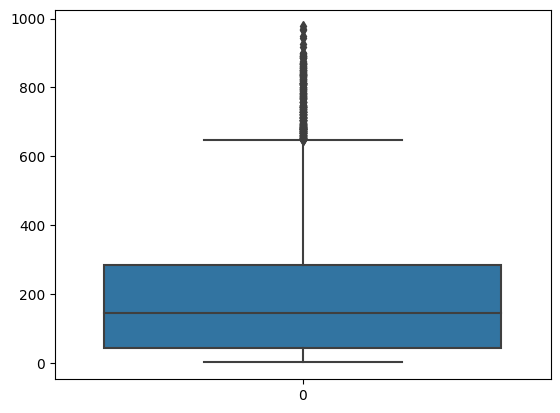

In [ ]:
sns.boxplot(data = df['count'])

In [ ]:
iqr = np.percentile(df['count'], 75) - np.percentile(df['count'], 25)
iqr

242.0

In [ ]:
upper_whisker = np.percentile(df['count'], 75) + (1.5 * iqr)
upper_whisker

647.0

In [ ]:
outliers = df.loc[df['count'] > upper_whisker]
len(outliers)

300

In [ ]:
# As we have enough data to do the analysis, lets drop the outlers from the dataset.
df = df.loc[df['count'] < upper_whisker]

## Univariant and bivariant analysis of variables

<Axes: xlabel='count', ylabel='Count'>

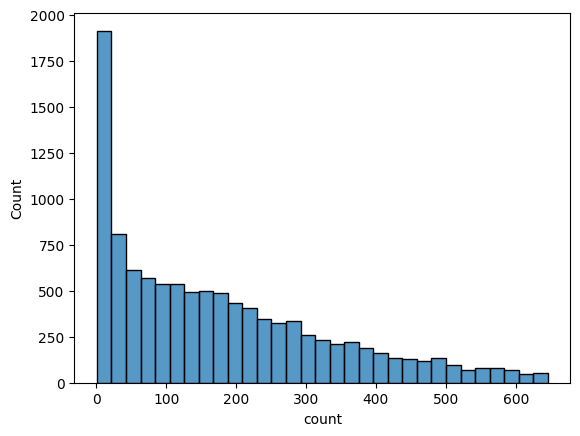

In [ ]:
sns.histplot(df['count'])

<Axes: xlabel='season', ylabel='count'>

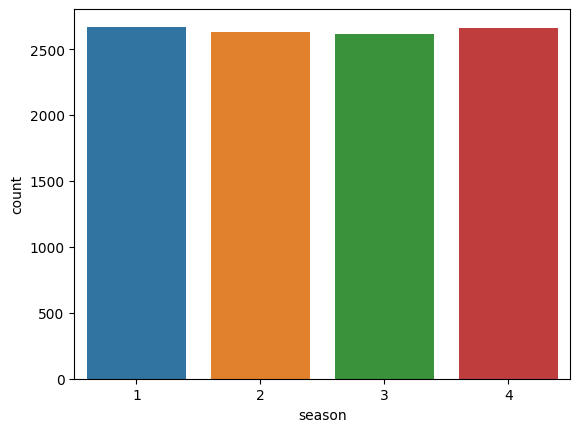

In [ ]:
sns.countplot(x = df['season'])

Data is almost evenly distributed among all the seasons.

<Axes: xlabel='holiday', ylabel='count'>

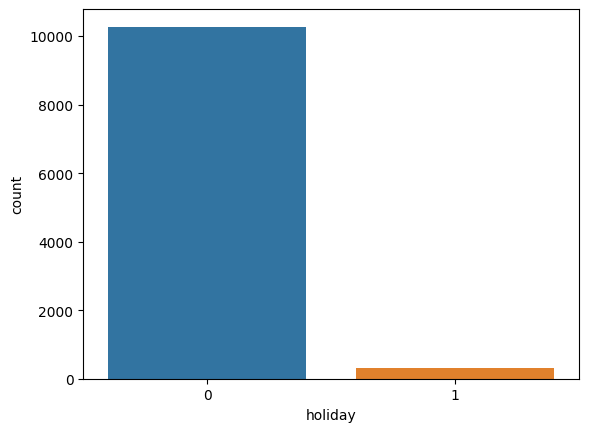

In [ ]:
sns.countplot(x = df['holiday'])

Data on holidays is very less compared to non-holidays but, there is enough data to do the analysis.

<Axes: xlabel='workingday', ylabel='count'>

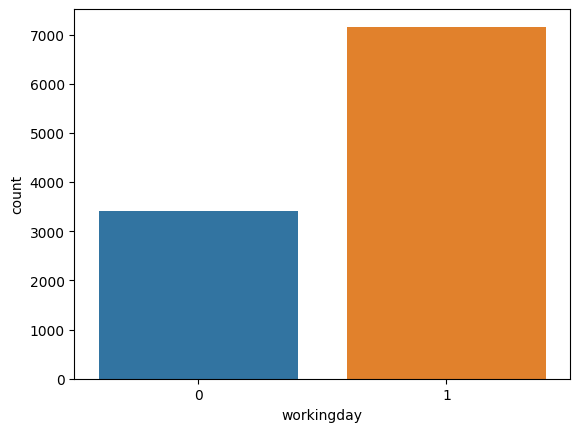

In [ ]:
sns.countplot(x = df['workingday'])

<Axes: xlabel='weather', ylabel='count'>

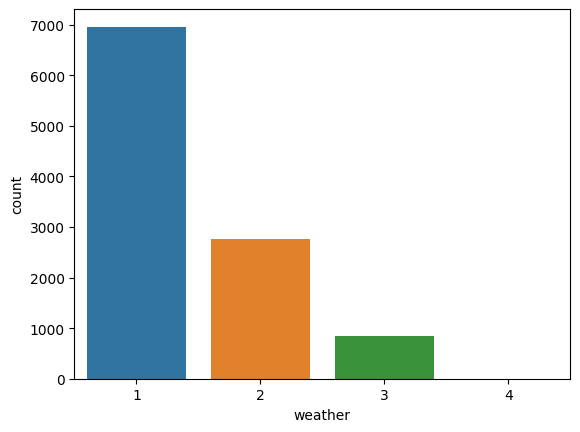

In [ ]:
sns.countplot(x = df['weather'])

Data on weather 4 is almost zero, let's find the number of records for weather 4 and delete the data if required.

In [ ]:
df[df['weather'] == 4]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
5631,2012-01-09 18:00:00,1,0,1,4,8.2,11.365,86,6.0032,6,158,164


In [ ]:
# since there is only one record in the dataset with weather 4, lets delete that data for better analysis
df = df.loc[df['weather'] != 4]
df.shape

(10582, 12)

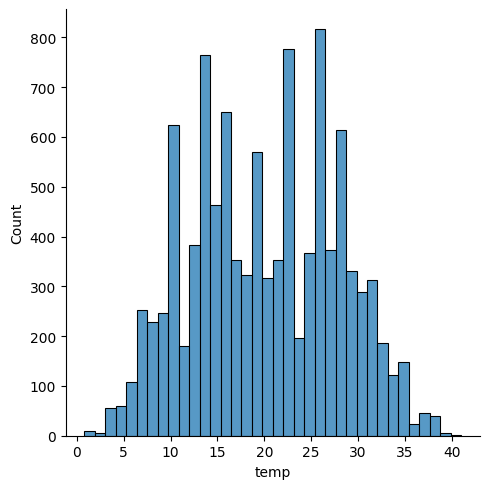

In [ ]:
sns.displot(data = df['temp'])

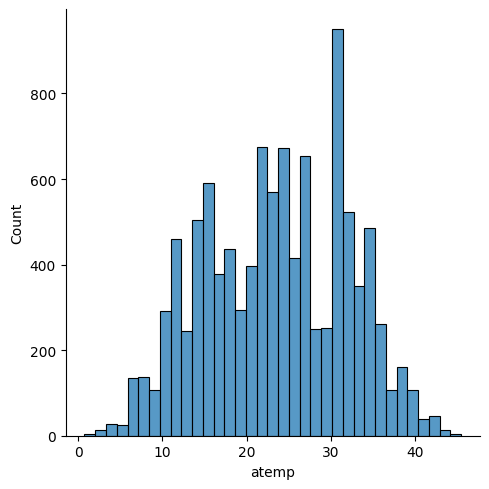

In [ ]:
sns.displot(df['atemp'])

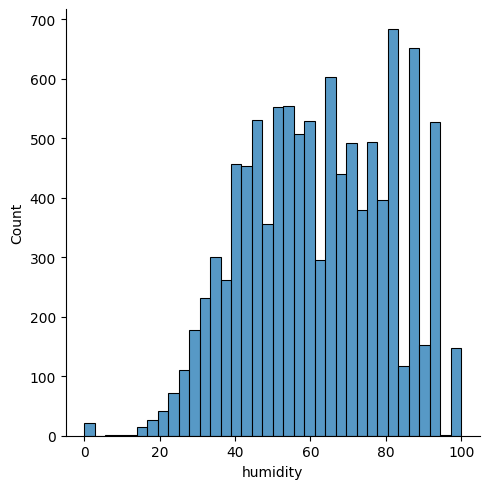

In [ ]:
sns.displot(df['humidity'])

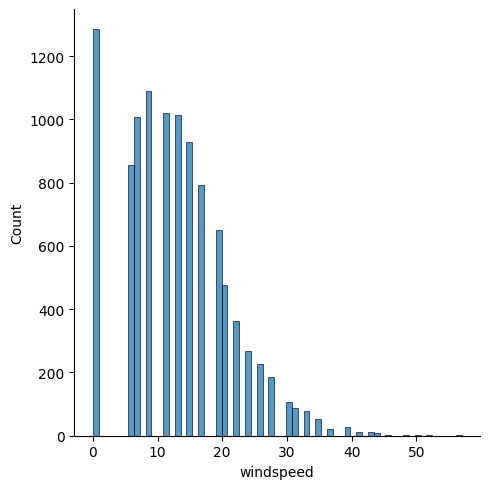

In [ ]:
sns.displot(df['windspeed'])

Windspeed distribution is right skewed with most of the values towards zero.

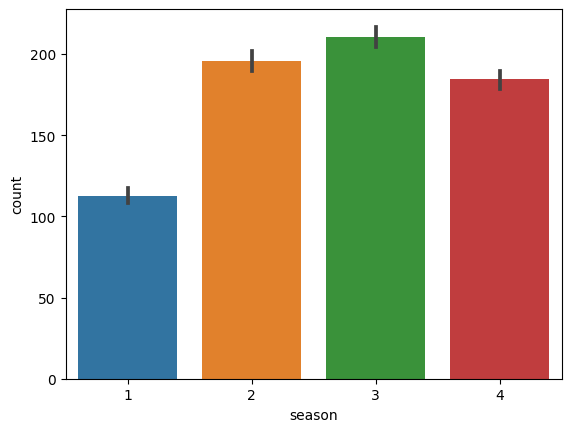

In [ ]:
sns.barplot(data = df, x = 'season', y = 'count')
plt.show()

From the above figure we can see that average rides in season 3 (fall) is highest.

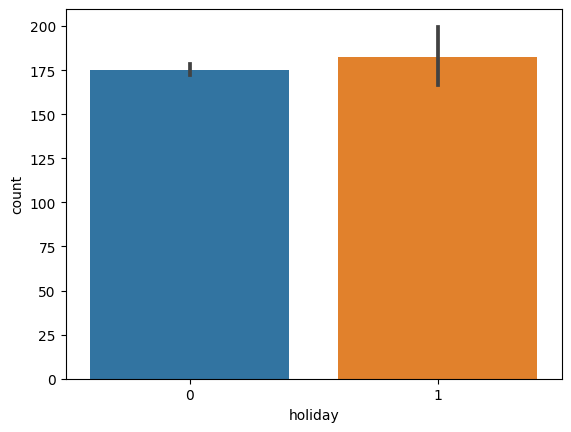

In [ ]:
sns.barplot(data = df, x = 'holiday', y = 'count')
plt.show()

Average number of rides are almost same on both holidays and non-holidays

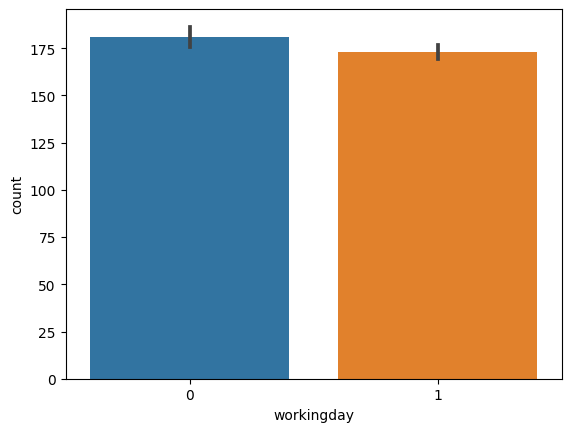

In [ ]:
sns.barplot(data = df, x = 'workingday', y = 'count')
plt.show()

Average number of rides are almost same on both working day and non working day

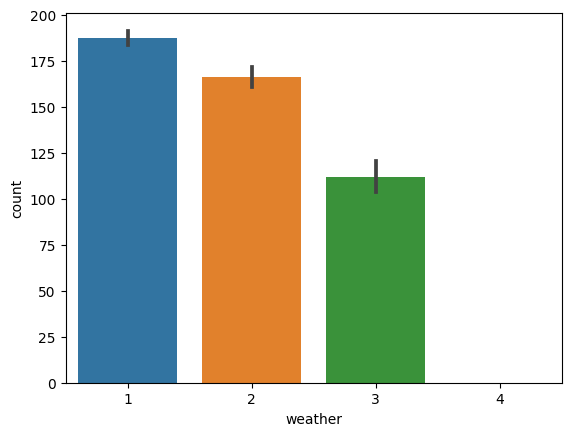

In [ ]:
sns.barplot(data = df, x = 'weather', y = 'count')
plt.show()

As weather gets difficult, average number of rides is decreasing.

<ipython-input-31-fe43fffaf13b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

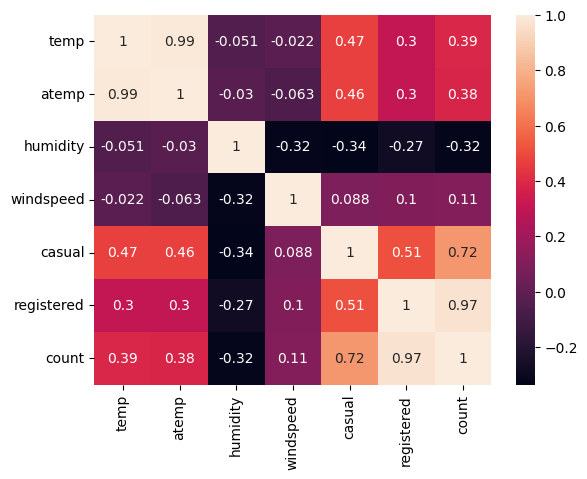

In [ ]:
sns.heatmap(df.corr(), annot = True)

From the above heat map, we can see that temp and atemp have more relationship with casual count than registered count.

## Hypothesis testing

### Relationship between working Day and number of electric cycles rented.

<Axes: xlabel='workingday', ylabel='count'>

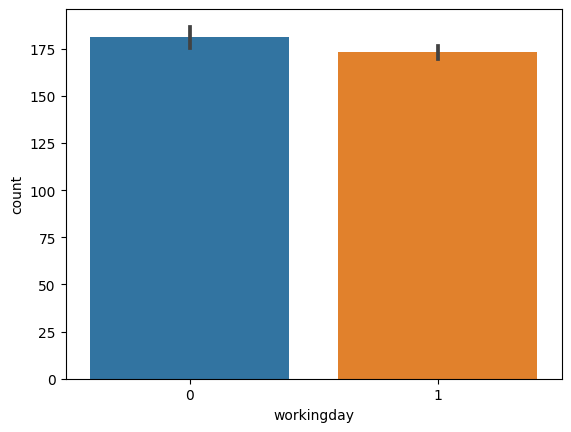

In [ ]:
sns.barplot(data = df, x = 'workingday', y = 'count')

We can do hypothesis testing to find if working Day has an effect on the number of electric cycles rented, for that we have to do **2-sample ttest at 0.05 significance level**.

**Null hypothesis H0** : The number of cycles rented has no significant relationship with the working day.

**Alternate Hypothesis Ha** : The number of cycles rented on non working day is more than on working day.

In [ ]:
non_working_count = df[df['workingday'] == 0]['count']
working_count = df[df['workingday'] == 1]['count']

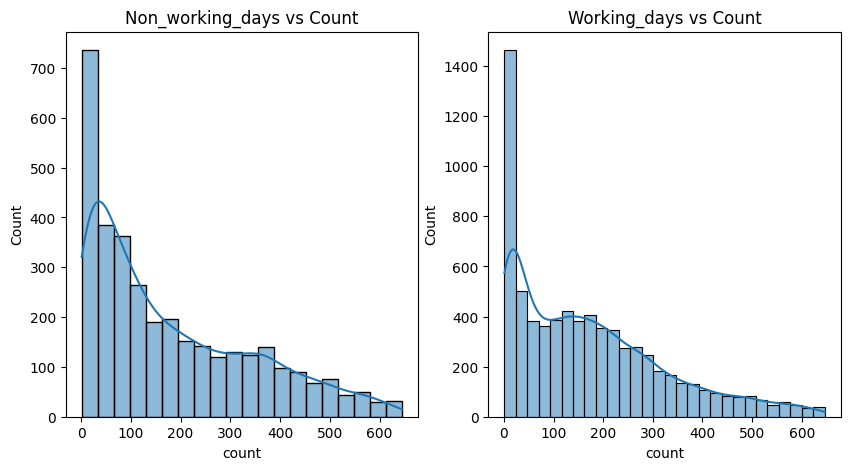

In [ ]:
# Visual analysis to check the normality of the data using histograms.

plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.histplot(non_working_count, kde = True)
plt.title('Non_working_days vs Count')

plt.subplot(1,2,2)
sns.histplot(working_count, kde = True)
plt.title('Working_days vs Count')

plt.show()

In [ ]:
# Statistically analysis to check the normality of the data using Shapiro-wilk test
# H0 : data is normally distributed
# Ha : data is not distributed normally
alpha = 0.05

# test for non working day
stat, p_val = shapiro(non_working_count)
print(p_val)
if p_val < alpha:
  print('Reject null hypothesis, data is not distributed normally for nonworking day')

else:
  print('Failed to reject the null hypothesis, data is distributed normally for nonworking day')

# test for working day
stat, p_val = shapiro(working_count)
print(p_val)
if p_val < alpha:
  print('Reject null hypothesis, data is not distributed normally for working day')

else:
  print('Failed to reject the null hypothesis, data is distributed normally for working day')


2.5223372357846707e-44
Reject null hypothesis, data is not distributed normally for nonworking day
0.0
Reject null hypothesis, data is not distributed normally for working day


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
# Statistically test the variance of the data using levene test
# H0 : Variances are equal
# Ha : Variances are not equal
alpha = 0.05

stat, p_val = levene(non_working_count, working_count)

print(p_val)
if p_val < alpha:
  print('Reject null hypothesis, both the variances are not equal')

else:
  print('Failed to reject the null hypothesis, both the variances are equal')


7.709692434868691e-07
Reject null hypothesis, both the variances are not equal


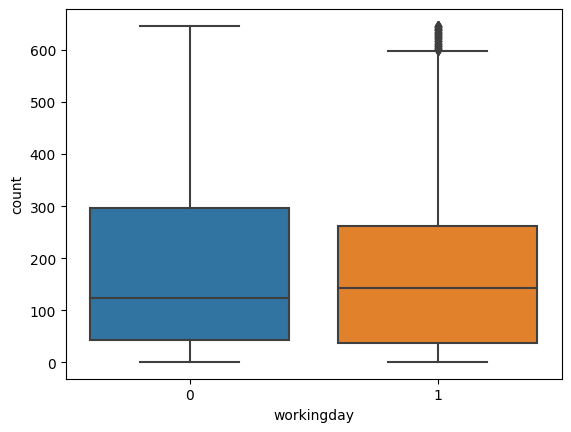

In [ ]:
sns.boxplot(x = df['workingday'], y = df['count'])
plt.show()

From the above visual and statistical analysis, we can see that the data is not guassion and not of equi variance but we can still proceed with the test as ttest doesn't rely much on those when the sample size is large.

In [ ]:
# 2 sample T-test
# Null hypothesis H0 : The number of cycles rented has no significant relationship with the working day.
# Alternate Hypothesis Ha : The number of cycles rented on non working day is more than on working day.

alpha = 0.05

stat, p_val = ttest_ind(non_working_count, working_count, alternative = 'greater')

print(p_val)
if p_val < alpha:
  print('Reject null hypothesis, number of cycles rented on non working day is more than on working day.')
else:
  print('Failed to reject the null hypothesis, number of cycles rented has no significant relationship with the working day.')

0.007138051645099429
Reject null hypothesis, number of cycles rented on non working day is more than on working day.


Insights:

Hence, based on the hypothesis testing, we can conclude that the number of cycles rented on non-working days is relatively higher compared to the number of cycles rented on working days.

### Relationship between number of cycles rented similar or different in different seasons

In [ ]:
season1_count = df[df['season'] == 1]['count']
season2_count = df[df['season'] == 2]['count']
season3_count = df[df['season'] == 3]['count']
season4_count = df[df['season'] == 4]['count']

In [ ]:
def significance_test(p_val, alpha = 0.05):
  print(p_val)
  if p_val < alpha:
    print('Reject null hypothesis')
  else:
    print('Failed to reject null hypothesis')

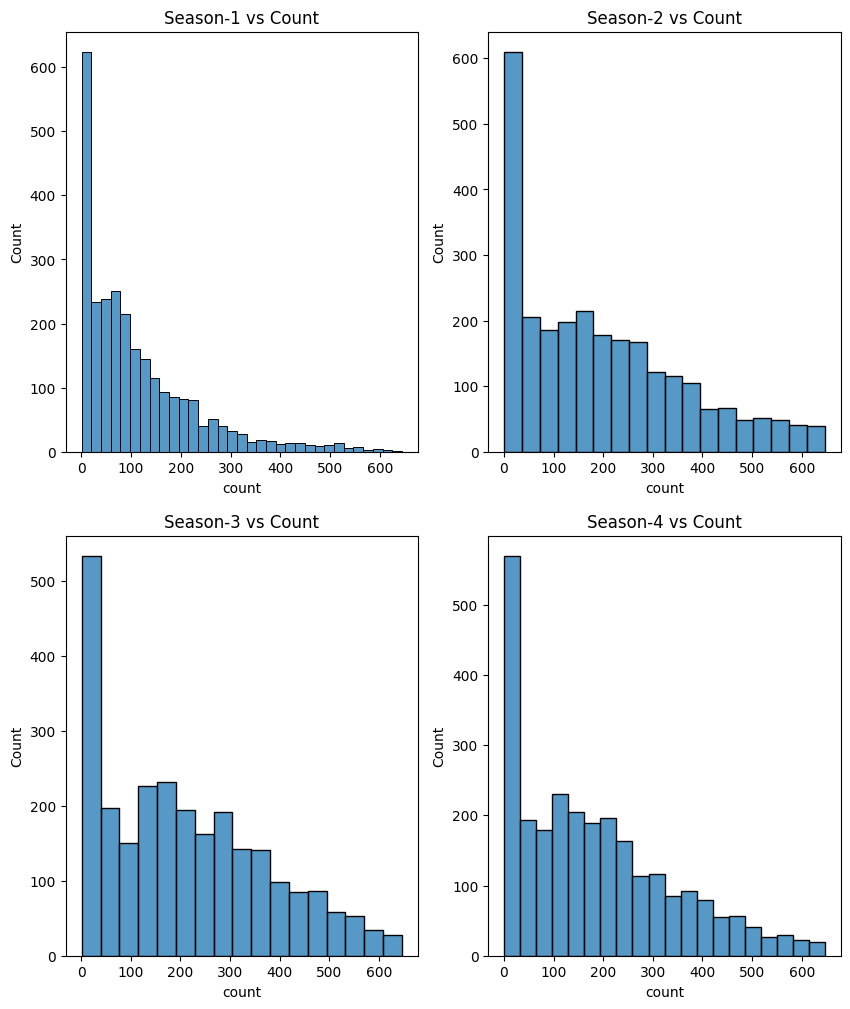

In [ ]:
plt.figure(figsize = (10,12))

plt.subplot(2,2,1)
sns.histplot(season1_count)
plt.title('Season-1 vs Count')

plt.subplot(2,2,2)
sns.histplot(season2_count)
plt.title('Season-2 vs Count')

plt.subplot(2,2,3)
sns.histplot(season3_count)
plt.title('Season-3 vs Count')

plt.subplot(2,2,4)
sns.histplot(season4_count)
plt.title('Season-4 vs Count')

plt.show()

In [ ]:
# statistical test to check if data is gaussion for season 1
# H0 : data is gaussion
# Ha : data is not gaussion
stat, p_val = shapiro(season1_count)
significance_test(p_val)

0.0
Reject null hypothesis


In [ ]:
# statistical test to check if data is gaussion for season 2
# H0 : data is gaussion
# Ha : data is not gaussion
stat, p_val = shapiro(season2_count)
significance_test(p_val)

4.78203140974081e-36
Reject null hypothesis


In [ ]:
# statistical test to check if data is gaussion for season 3
# H0 : data is gaussion
# Ha : data is not gaussion
stat, p_val = shapiro(season3_count)
significance_test(p_val)

6.607938637391792e-32
Reject null hypothesis


In [ ]:
# statistical test to check if data is gaussion for season 4
# H0 : data is gaussion
# Ha : data is not gaussion
stat, p_val = shapiro(season4_count)
significance_test(p_val)

1.3193750315544908e-35
Reject null hypothesis


In [ ]:
# statistical test to check if data is of equal variance
# H0 : data is of equal variance
# Ha : data is not of equal variance
stat, p_val = levene(season1_count, season2_count, season3_count, season4_count)
significance_test(p_val)

2.8888914121532733e-112
Reject null hypothesis


Based on the above analysis, it can be observed that the data does not follow a normal distribution and exhibits unequal variances. In this scenario, while the Kruskal-Wallis test is an alternative suitable for non-normally distributed data, it is worth noting that for a large sample dataset, conducting an analysis of variance (ANOVA) can also be appropriate.

In [ ]:
# ANOVA test
# H0 : No. of cycles rented is similar in different seasons
# Ha : No. of cycles rented is different in different seasons

stat, p_val = f_oneway(season1_count, season2_count, season3_count, season4_count)
significance_test(p_val)

8.676980501913448e-137
Reject null hypothesis


Insights:

Based on the above analysis, we can conclude that the number of cycles rented varies across different seasons.

### Relationship between number of cycles rented similar or different in different weather conditions.

In [ ]:
weather1 = df[df['weather'] == 1]['count']
weather2 = df[df['weather'] == 2]['count']
weather3 = df[df['weather'] == 3]['count']
# we have deleted the weather 4 as there is only one data point.

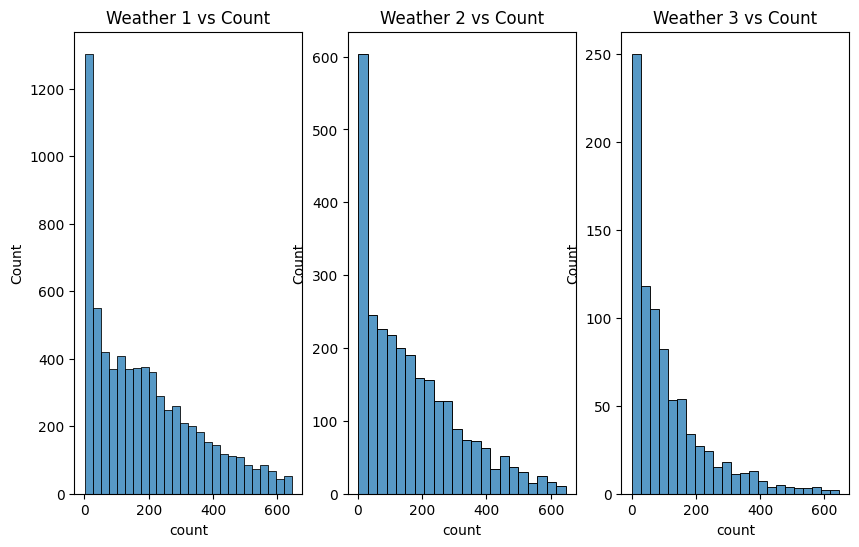

In [ ]:
plt.figure(figsize = (10,6))

plt.subplot(1,3,1)
sns.histplot(weather1)
plt.title('Weather 1 vs Count')

plt.subplot(1,3,2)
sns.histplot(weather2)
plt.title('Weather 2 vs Count')

plt.subplot(1,3,3)
sns.histplot(weather3)
plt.title('Weather 3 vs Count')

plt.show()

In [ ]:
# statistical test to check if data is gaussion for weather 1
# H0 : data is gaussion
# Ha : data is not gaussion
stat, p_val = shapiro(weather1)
significance_test(p_val)

0.0
Reject null hypothesis


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
# statistical test to check if data is gaussion for weather 2
# H0 : data is gaussion
# Ha : data is not gaussion
stat, p_val = shapiro(weather2)
significance_test(p_val)

9.532115602307598e-39
Reject null hypothesis


In [ ]:
# statistical test to check if data is gaussion for weather 3
# H0 : data is gaussion
# Ha : data is not gaussion
stat, p_val = shapiro(weather3)
significance_test(p_val)

2.4638935234478347e-30
Reject null hypothesis


In [ ]:
# statistical test to check if data is of equal variance
# H0 : data is of equal variance
# Ha : data is not of equal variance
stat, p_val = levene(weather1, weather2, weather3)
significance_test(p_val)

4.0910836644825954e-38
Reject null hypothesis


Based on the above analysis, it can be observed that the data does not follow a normal distribution and exhibits unequal variances. In this scenario, while the Kruskal-Wallis test is an alternative suitable for non-normally distributed data, it is worth noting that for a large sample dataset, conducting an analysis of variance (ANOVA) can also be appropriate.

In [ ]:
# ANOVA test
# H0 : No. of cycles rented is similar in different weather conditions
# Ha : No. of cycles rented is different in different weather conditions

stat, p_val = f_oneway(weather1, weather2, weather3)
significance_test(p_val)

2.749873188252358e-42
Reject null hypothesis


Insights:

Based on the above analysis, we can conclude that the number of cycles rented varies across different weather conditions. To determine which season has the highest number of cycle rentals, we should conduct various other statistical tests.

### Relationship between weather and season

In [ ]:
chi_tab = pd.crosstab(df['season'], df['weather'])
chi_tab

weather,1,2,3
season,,,
1,1744,714,211
2,1720,690,223
3,1842,579,195
4,1656,787,221


In [ ]:
# Chi square test
# H0: There is no significant relationship between season and weather
# Ha: There is a significant relationship between season and weather

p_val = chi2_contingency(chi_tab)[1]
significance_test(p_val)

6.753122128664637e-08
Reject null hypothesis


Insights:

Based on the above analysis, we can conclude that there is a significant relationship between the season and weather conditions. To determine the exact nature of this relationship, further statistical tests are required.

## Recommendations

1. XYZ should consider the fact that the number of cycles rented on non-working days is higher. Therefore, any actions such as maintenance or repairs should be planned for working days to ensure the availability of cycles on non-working days.

2. Given that the number of cycles rented varies across different seasons and weather conditions, XYZ should develop its action plan accordingly. This may involve increasing the number of cycles or expanding services in different regions as needed.

**Note**: Further analysis, using various statistical tests on additional variables such as region and time, can help uncover the exact nature of relationships between these variables. This will aid in making more informed decisions.